In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Sep  1 19:12:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Sep  1 19:13:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 95.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.5 MB/s eta 0:00:

In [1]:
!pip install google-cloud-storage

In [2]:
!git clone https://github.com/autodistill/autodistill-grounded-sam-2

Cloning into 'autodistill-grounded-sam-2'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 98 (delta 46), reused 68 (delta 21), pack-reused 0 (from 0)
Receiving objects: 100% (98/98), 24.73 KiB | 12.37 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [3]:
import os

In [4]:
os.chdir('/content/autodistill-grounded-sam-2')

In [5]:
!pip install rf_groundingdino

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 24.0 MB/s eta 0:00:00


In [6]:
from autodistill_grounded_sam_2 import GroundedSAM2
from autodistill.detection import CaptionOntology
from autodistill.utils import plot

In [7]:
from google.colab import auth
auth.authenticate_user()

In [8]:
from google.cloud import storage
from PIL import Image
import io
import matplotlib.pyplot as plt
import cv2
import numpy as np
import logging
import cv2
import tempfile
import os

In [12]:
# Below code is to perform segmentation of racoon image

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def initialize_model(prompt):
    """
    Initialize the GroundedSAM2 model with the given prompt.

    Args:
        prompt (str): Prompt for the model.

    Returns:
        GroundedSAM2: Initialized model instance.
    """
    logging.info(f"Initializing GroundedSAM2 model with prompt: {prompt}")
    prompt_dict = {prompt: prompt}
    model = GroundedSAM2(
        ontology=CaptionOntology(prompt_dict)
    )
    logging.info("Model initialized successfully.")
    return model

def process_image(model, image_path):
    """
    Process an image file with the GroundedSAM2 model.

    Args:
        model (GroundedSAM2): Initialized model instance.
        image_path (str): Path to the image file.

    Returns:
        tuple: Original image, segmentation mask, and annotated image.
    """
    logging.info(f"Processing image: {image_path}")

    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = model.predict(image_path)
    logging.info(f"Prediction results: {results}")

    # Create segmentation mask
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    if isinstance(results.mask, np.ndarray):
        mask = results.mask.squeeze().astype(np.uint8) * 255

    # Create annotated image
    annotated_image = plot(
        image=image_rgb,
        classes=model.ontology.classes(),
        detections=results,
        raw=True
    )

    return image_rgb, mask, annotated_image

def plot_results(image, mask, annotated_image):
    """
    Plot the original image, segmentation mask, and annotated image.

    Args:
        image (numpy.ndarray): Original image.
        mask (numpy.ndarray): Segmentation mask.
        annotated_image (numpy.ndarray): Annotated image.
    """
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Segmentation Mask")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(annotated_image)
    plt.title("Annotated Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def main():
    # Initialize the model with the "racoon" prompt
    model = initialize_model("racoon")

    # Process a single image
    image_path = "/content/001_racoon_1_000001.jpg"
    image, mask, annotated_image = process_image(model, image_path)

    # Plot the results
    plot_results(image, mask, annotated_image)


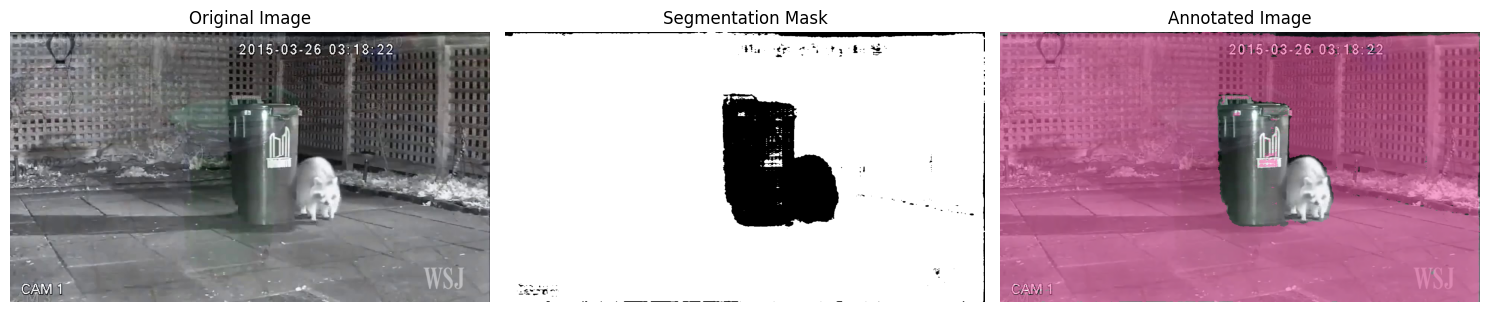

In [13]:
  logging.info("Starting the application")
  main()
  logging.info("Application completed")

In [ ]:
# from google.colab import auth
# auth.authenticate_user()

In [ ]:
# from google.colab import files
# uploaded = files.upload()  # Upload your JSON key file here

In [ ]:
# import os
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'service_account.json'

In [ ]:
# from google.cloud import storage

# # Set the project ID explicitly
# project_id = 'racoon-detection-427421'
# client = storage.Client(project=project_id)

In [10]:
import logging
import cv2
import numpy as np
import tempfile
import os
from google.cloud import storage
import torch

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def initialize_model(prompt):
    """
    Initialize the GroundedSAM2 model with the given prompt.

    Args:
        prompt (str): Prompt for the model.

    Returns:
        GroundedSAM2: Initialized model instance.
    """
    logging.info(f"Initializing GroundedSAM2 model with prompt: {prompt}")
    prompt_dict = {prompt: prompt}
    model = GroundedSAM2(
        ontology=CaptionOntology(prompt_dict)
    )
    logging.info("Model initialized successfully.")
    return model

def process_image(model, image):
    """
    Process an image file with the GroundedSAM2 model.

    Args:
        model (GroundedSAM2): Initialized model instance.
        image (numpy.ndarray): Image data.

    Returns:
        tuple: Segmentation mask and annotated image.
    """
    logging.info("Processing image")

    # Save image to a temporary file
    with tempfile.NamedTemporaryFile(delete=False, suffix='.jpg') as temp_file:
        cv2.imwrite(temp_file.name, image)
        temp_file_path = temp_file.name

    # Use the file path with the model
    results = model.predict(temp_file_path)
    logging.info(f"Prediction results: {results}")

    # Create segmentation mask
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    if isinstance(results.mask, np.ndarray):
        mask = results.mask.squeeze().astype(np.uint8) * 255

    # Create annotated image
    annotated_image = plot(
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
        classes=model.ontology.classes(),
        detections=results,
        raw=True
    )

    # Resize images if they exceed the maximum allowed size
    def resize_if_needed(img, max_size):
        h, w = img.shape[:2]
        if max(h, w) > max_size:
            scale = max_size / max(h, w)
            new_size = (int(w * scale), int(h * scale))
            return cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR)
        return img

    max_dimension = 65500
    mask = resize_if_needed(mask, max_dimension)
    annotated_image = resize_if_needed(annotated_image, max_dimension)

    # Clean up the temporary file
    os.remove(temp_file_path)

    return mask, annotated_image

def upload_to_bucket(bucket_name, destination_blob_name, content):
    """
    Upload content to a Google Cloud Storage bucket.

    Args:
        bucket_name (str): The name of the bucket.
        destination_blob_name (str): The destination path in the bucket.
        content (bytes): The content to upload.
    """
    try:
        client = storage.Client()
        bucket = client.get_bucket(bucket_name)
        blob = bucket.blob(destination_blob_name)
        blob.upload_from_string(content, content_type='image/jpeg')
        logging.info(f"Uploaded {destination_blob_name} to bucket {bucket_name}")
    except Exception as e:
        logging.error(f"Failed to upload {destination_blob_name} to bucket {bucket_name}: {e}")

def main():
    # Authenticate if running in Google Colab
    from google.colab import auth
    auth.authenticate_user()

    # Initialize the model with the "racoon" prompt
    model = initialize_model("racoon")

    # Set PyTorch memory management
    torch.cuda.empty_cache()
    torch.cuda.set_per_process_memory_fraction(0.5, 0)

    # Google Cloud Storage bucket names
    # source_bucket_name = '04_cvat_annotations-4v6cnheu'
    source_bucket_name ='06_annotation_input'
    destination_bucket_name = '05_cvat_annotations1-4v6cnheu'

    # Initialize Google Cloud Storage client
    client = storage.Client()

    # Access source bucket
    source_bucket = client.get_bucket(source_bucket_name)

    # List all blobs (files) in the source bucket
    blobs = list(source_bucket.list_blobs())

    for blob in blobs:
        if blob.name.lower().endswith(('.png', '.jpg', '.jpeg')):
            logging.info(f"Processing file: {blob.name}")

            try:
                # Download the image
                image_data = blob.download_as_bytes()
                image = cv2.imdecode(np.frombuffer(image_data, np.uint8), cv2.IMREAD_COLOR)

                # Process the image
                mask, annotated_image = process_image(model, image)

                try:
                    # Save segmentation mask and annotated image to in-memory buffer
                    _, mask_encoded = cv2.imencode('.jpg', mask)
                    mask_bytes = mask_encoded.tobytes()

                    _, annotated_image_encoded = cv2.imencode('.jpg', annotated_image)
                    annotated_image_bytes = annotated_image_encoded.tobytes()

                    # Upload the segmented output to the destination bucket
                    upload_to_bucket(destination_bucket_name, f"segmented_{blob.name}", mask_bytes)
                    upload_to_bucket(destination_bucket_name, f"annotated_{blob.name}", annotated_image_bytes)

                except Exception as e:
                    logging.error(f"Error processing image {blob.name}: {e}")

                # Clear GPU cache after processing each image
                torch.cuda.empty_cache()

            except Exception as e:
                logging.error(f"Failed to process image {blob.name}: {e}")

In [11]:
  logging.info("Starting the application to perform segmentation of images stored in a bucket")
  main()
  logging.info("Application completed")


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]